In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv("train.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
136424    False
136425    False
136426    False
136427    False
136428    False
Length: 136429, dtype: bool

In [5]:
X=df.drop(columns=["id","Product ID","Machine failure"])
Y=df[["Machine failure"]]

In [6]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [7]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [8]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Type']

In [10]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


## Creating A Primary Preprocessing Pipeline

In [12]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                         ("scaler",StandardScaler())])

In [13]:
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                         ('ordinal',OrdinalEncoder())])

In [14]:
pre1=ColumnTransformer([('num',num_pipe,con),('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [15]:
X_pre=pre1.fit_transform(X)
X_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0


## Feature Selection

In [16]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X_pre,Y)

In [17]:
mi

array([0.00523341, 0.00236736, 0.01946802, 0.01967135, 0.00657743,
       0.00776048, 0.02466242, 0.01185363, 0.01863298, 0.00158072,
       0.01117293])

In [18]:
mi=pd.Series(mi)
mi.index=X_pre.columns
mi=mi.sort_values(ascending=False)
mi

num__HDF                        0.024662
num__Torque [Nm]                0.019671
num__Rotational speed [rpm]     0.019468
num__OSF                        0.018633
num__PWF                        0.011854
cat__Type                       0.011173
num__TWF                        0.007760
num__Tool wear [min]            0.006577
num__Air temperature [K]        0.005233
num__Process temperature [K]    0.002367
num__RNF                        0.001581
dtype: float64

<Axes: >

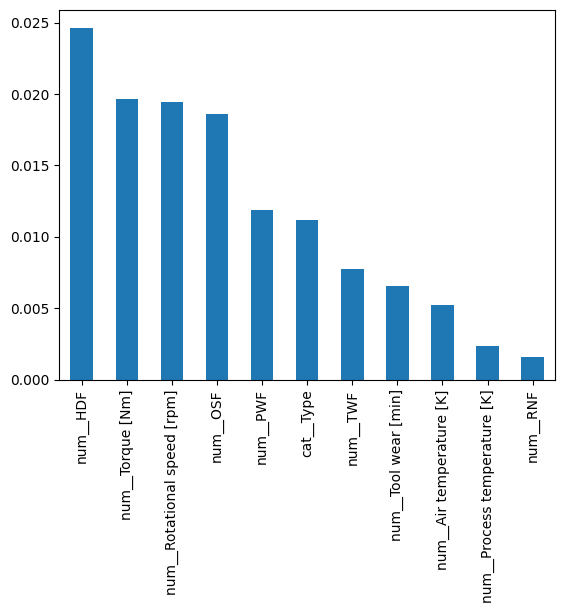

In [19]:
mi.plot(kind='bar')

In [20]:
from sklearn.feature_selection import SelectKBest
sel=SelectKBest(mutual_info_classif,k=5)
sel.fit(X_pre,Y)
sel_cols=sel.get_feature_names_out()
sel_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__PWF', 'num__OSF'], dtype=object)

In [21]:
imp_cols=[]
for i in sel_cols:
    s=i.split('__')[1]
    imp_cols.append(s)

In [22]:
imp_cols

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'PWF', 'OSF']

In [23]:
X_imp=X[imp_cols]
X_imp

,Rotational speed [rpm],Torque [Nm],HDF,PWF,OSF
0,1596,36.1,0,0,0
1,1759,29.1,0,0,0
2,1805,26.5,0,0,0
3,1524,44.3,0,0,0
4,1641,35.4,0,0,0
...,...,...,...,...,...
136424,1530,37.5,0,0,0
136425,1447,49.1,0,0,0
136426,1524,38.5,0,0,0
136427,1447,46.3,0,0,0


In [24]:
cat_sel=list(X_imp.columns[X_imp.dtypes=='object'])
con_sel=list(X_imp.columns[X_imp.dtypes!='object'])

In [25]:
cat_sel

[]

In [26]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'PWF', 'OSF']

In [27]:
from sklearn.preprocessing import OneHotEncoder

## Creating A Preprocessing Pipleline with Selected Features

In [28]:
num_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

In [29]:
cat_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                          ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [32]:
pre2=ColumnTransformer([('num',num_pipe2,con_sel),('cat',cat_pipe2,cat_sel)]).set_output(transform='pandas')

In [33]:
X_sel_pre=pre2.fit_transform(X_imp)
X_sel_pre

,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__PWF,num__OSF
0,0.545416,-0.499711,-0.072021,-0.049016,-0.063038
1,1.720308,-1.323028,-0.072021,-0.049016,-0.063038
2,2.051873,-1.628831,-0.072021,-0.049016,-0.063038
3,0.026445,0.464745,-0.072021,-0.049016,-0.063038
4,0.869773,-0.582043,-0.072021,-0.049016,-0.063038
...,...,...,...,...,...
136424,0.069693,-0.335048,-0.072021,-0.049016,-0.063038
136425,-0.528565,1.029305,-0.072021,-0.049016,-0.063038
136426,0.026445,-0.217431,-0.072021,-0.049016,-0.063038
136427,-0.528565,0.699979,-0.072021,-0.049016,-0.063038


In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_sel_pre,Y,test_size=0.3,random_state=26)

## Algorithm Evaluation on Classification Algorithms

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [41]:

dct={'Logistic': LogisticRegression(),
     "Decision Tree": DecisionTreeClassifier(),
     "Random Forest": RandomForestClassifier(),
     "Gradient Boosting": GradientBoostingClassifier()}

In [42]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boosting', GradientBoostingClassifier())])

In [43]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [44]:
tr=[]
ts=[]
tr_cv=[]
for name,model in dct.items():
    model.fit(xtrain,ytrain)
    ypred_tr=model.predict(xtrain)
    ypred_ts=model.predict(xtest)
    f1_tr=f1_score(ytrain,ypred_tr)
    f1_ts=f1_score(ytest,ypred_ts)
    scores=cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1_macro')
    f1_cv=scores.mean()
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    print(f'Model Name: {name}\n')
    print(f'Train _f1: {f1_tr:.4f}')
    print(f"Test F1: {f1_ts:.4f}")
    print(f'Train cross validated score: {f1_cv:.4f}')
    print("\n=========================================\n")

Model Name: Logistic

Train _f1: 0.8032
Test F1: 0.8074
Train cross validated score: 0.9001


Model Name: Decision Tree

Train _f1: 0.8973
Test F1: 0.7365
Train cross validated score: 0.8663


Model Name: Random Forest

Train _f1: 0.8964
Test F1: 0.7747
Train cross validated score: 0.8851


Model Name: Gradient Boosting

Train _f1: 0.8145
Test F1: 0.8058
Train cross validated score: 0.8986




In [45]:
list(dct.keys())

['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

In [46]:
results_dct={"Model Name": list(dct.keys()),
             "Train F1":tr,
             "Test F1":ts,
             "Train F1 Cv":tr_cv}

In [47]:
results_df=pd.DataFrame(results_dct)
results_df

,Model Name,Train F1,Test F1,Train F1 Cv
0,Logistic,0.803247,0.807393,0.900067
1,Decision Tree,0.897336,0.736475,0.866297
2,Random Forest,0.896430,0.774725,0.885141
3,Gradient Boosting,0.814504,0.805769,0.898647


## Here Logistic Regression Performs Better Among Other Algorithms.

In [48]:
results_df=results_df.sort_values(by='Test F1',ascending=False)
results_df

,Model Name,Train F1,Test F1,Train F1 Cv
0,Logistic,0.803247,0.807393,0.900067
3,Gradient Boosting,0.814504,0.805769,0.898647
2,Random Forest,0.896430,0.774725,0.885141
1,Decision Tree,0.897336,0.736475,0.866297


In [49]:
best_model=LogisticRegression()
best_model.fit(xtrain,ytrain)

LogisticRegression()

In [50]:
best_model.score(xtrain,ytrain)

0.9946701570680628

In [51]:
best_model.score(xtest,ytest)

0.9951623543208972

In [52]:
ypred_tr=best_model.predict(xtrain)
ypred_ts=best_model.predict(xtest)

In [53]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [54]:
ytest.head()

,Machine failure
131761,0
129041,0
106483,0
43922,0
89700,0


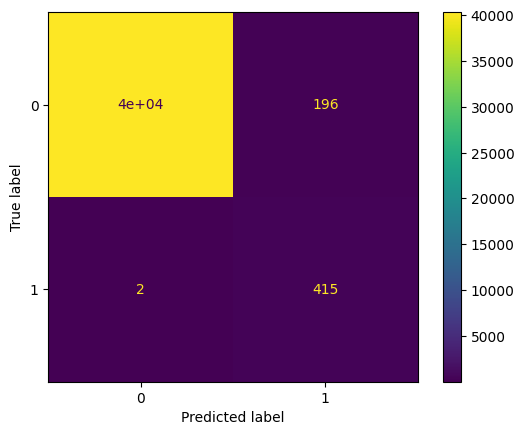

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cf=confusion_matrix(ypred_ts,ytest)
cfd=ConfusionMatrixDisplay(cf,display_labels=best_model.classes_)
cfd.plot()

In [56]:
from sklearn.metrics import classification_report
print(classification_report(ypred_ts,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40512
           1       0.68      1.00      0.81       417

    accuracy                           1.00     40929
   macro avg       0.84      1.00      0.90     40929
weighted avg       1.00      1.00      1.00     40929



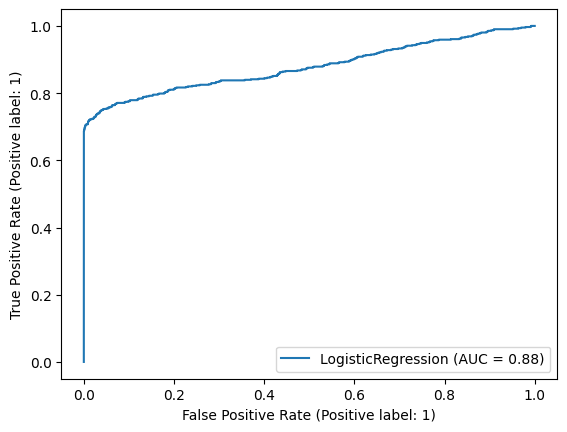

In [57]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

In [58]:
auc_scores=cross_val_score(best_model,xtrain,ytrain,cv=10,scoring='roc_auc')
auc_scores

array([0.9275172 , 0.89826958, 0.91557311, 0.87539047, 0.86829087,
       0.88022017, 0.87960475, 0.88993693, 0.89958217, 0.8923637 ])

In [59]:
auc_scores.mean()

0.8926748940832449

## Predicting Out of Sample Data

In [60]:
xnew=pd.read_csv("test.csv")
xnew

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [61]:
xnew_pre=pre2.transform(xnew)
xnew_pre

,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__PWF,num__OSF
0,-0.153753,-0.276240,-0.072021,-0.049016,-0.063038
1,1.388744,-1.358313,-0.072021,-0.049016,-0.063038
2,0.033653,-0.311525,-0.072021,-0.049016,-0.063038
3,-0.297912,0.852880,-0.072021,-0.049016,-0.063038
4,-0.038426,0.111895,-0.072021,-0.049016,-0.063038
...,...,...,...,...,...
90949,-0.261872,0.006040,-0.072021,-0.049016,-0.063038
90950,0.156188,-0.770229,-0.072021,-0.049016,-0.063038
90951,-0.139337,0.123657,-0.072021,-0.049016,-0.063038
90952,0.098524,-0.005721,-0.072021,-0.049016,-0.063038


In [62]:
preds=best_model.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
probs=best_model.predict_proba(xnew_pre)[:, 1]
probs

array([0.00298633, 0.00197864, 0.00311498, ..., 0.00440538, 0.00428594,
       0.00267029])

In [68]:
df_final=xnew[["id"]]
df_final


,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [69]:
df_final["Machine Failure 0(No) and 1(Yes) Preds"]=preds
df_final["Machine Failure Probability"]=probs

In [70]:
df_final

,id,Machine Failure 0(No) and 1(Yes) Preds,Machine Failure Probability
0,136429,0,0.002986
1,136430,0,0.001979
2,136431,0,0.003115
3,136432,0,0.008292
4,136433,0,0.004538
...,...,...,...
90949,227378,0,0.003746
90950,227379,0,0.002109
90951,227380,0,0.004405
90952,227381,0,0.004286


<Axes: xlabel='Machine Failure 0(No) and 1(Yes) Preds'>

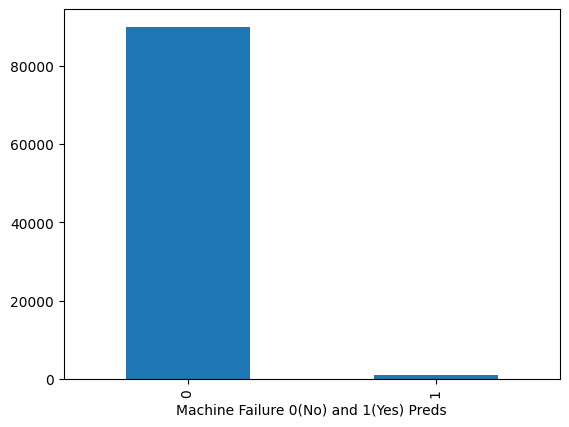

In [71]:
df_final["Machine Failure 0(No) and 1(Yes) Preds"].value_counts().plot(kind='bar')

In [72]:
df_final.to_csv("Machine Failure Submission.csv",index=False)